In [11]:
from ultralytics import YOLO
from ultralytics import RTDETR

#model = RTDETR(r"C:\Users\Paal\Downloads\bestOriginal.pt")
model2 = RTDETR(r"C:\Users\Paal\Downloads\bestRefinedAABB.pt")
model3 = YOLO(r"C:\Users\Paal\Downloads\bestRefinedOBB.pt")

#video = r"C:\Users\Paal\Downloads\13.4.A_1sec.avi"
#video = r"C:\Users\Paal\Downloads\1 (1).avi"
#video = r"C:\Users\Paal\Downloads\3.4.B.avi"
video = r"C:\Users\Paal\Downloads\14.3.A_1sec.avi"
video = r"C:\Users\Paal\ForskningNovemberDesember\1aviframe0.jpg"

imageQuadrant1 = r"C:\Users\Paal\ForskningNovemberDesember\Quadrants\bottom_left.jpg"
imageQuadrant2 = r"C:\Users\Paal\ForskningNovemberDesember\Quadrants\bottom_right.jpg"
imageQuadrant3 = r"C:\Users\Paal\ForskningNovemberDesember\Quadrants\top_left.jpg"
imageQuadrant4 = r"C:\Users\Paal\ForskningNovemberDesember\Quadrants\top_right.jpg"

results = model2.predict(source=imageQuadrant4, save=True, save_frames=True, save_txt=True, show_labels=False, show_conf=True)


image 1/1 C:\Users\Paal\ForskningNovemberDesember\Quadrants\top_right.jpg: 640x640 43 normal_sperms, 602.0ms
Speed: 2.5ms preprocess, 602.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
1 label saved to runs\detect\predict9\labels


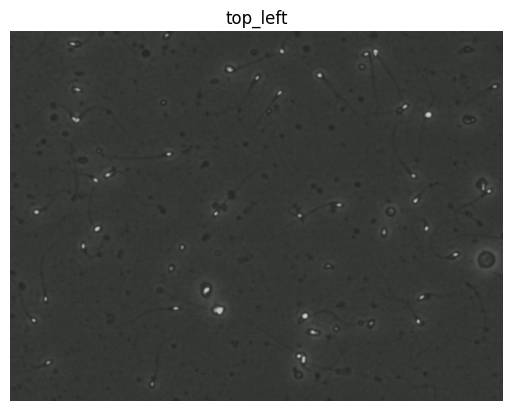

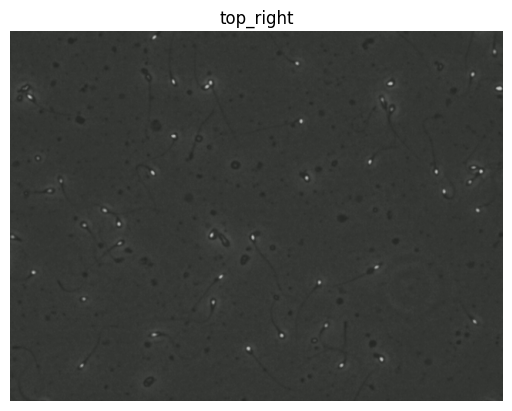

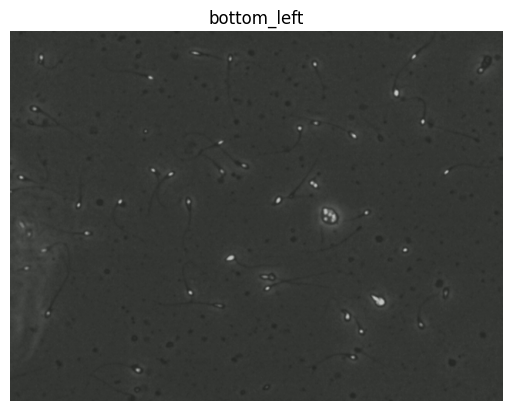

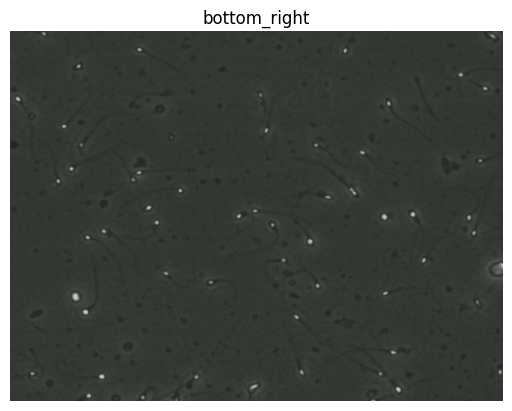

All quadrants have been processed and saved.


In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the input image
image_path = r"C:\Users\Paal\ForskningNovemberDesember\1aviframe0.jpg"

# Read the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the center coordinates
    center_x, center_y = width // 2, height // 2

    # Define the quadrants
    quadrants = {
        'top_left': image[0:center_y, 0:center_x],
        'top_right': image[0:center_y, center_x:width],
        'bottom_left': image[center_y:height, 0:center_x],
        'bottom_right': image[center_y:height, center_x:width]
    }

    # Desired output size (width, height)
    output_size = (640, 480)

    # Output directory
    output_dir = r"C:\Users\Paal\ForskningNovemberDesember\Quadrants"
    os.makedirs(output_dir, exist_ok=True)

    # Process and save each quadrant
    for name, quadrant in quadrants.items():
        # Resize the quadrant
        resized = cv2.resize(quadrant, output_size, interpolation=cv2.INTER_AREA)

        # Save the image
        output_path = os.path.join(output_dir, f"{name}.jpg")
        cv2.imwrite(output_path, resized)

        # Display the image (optional)
        # Convert BGR to RGB for displaying with matplotlib
        resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        plt.imshow(resized_rgb)
        plt.title(name)
        plt.axis('off')
        plt.show()

    print("All quadrants have been processed and saved.")


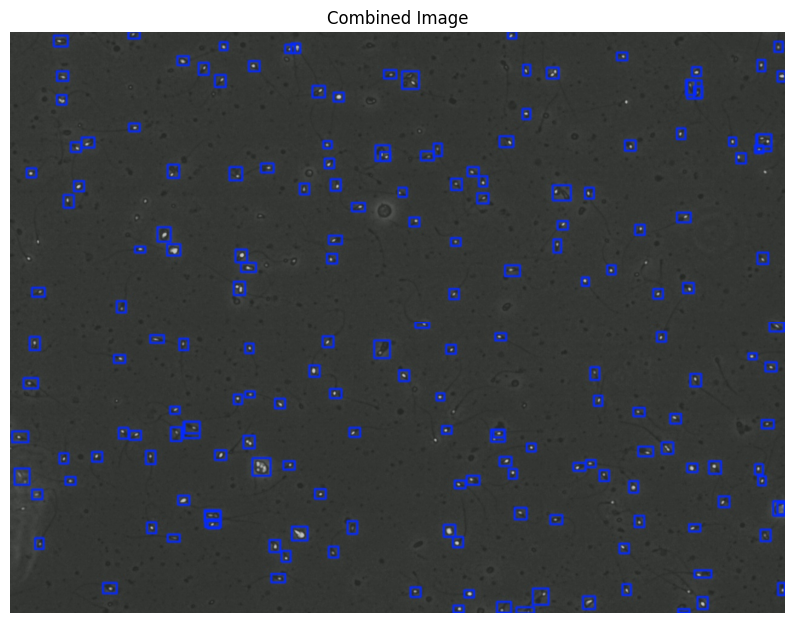

Combined image saved at: C:\Users\Paal\ForskningNovemberDesember\combined_image.jpg


In [12]:
#stitch output qudrant images back together

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Paths to the processed quadrants (update these paths if necessary)
top_left_path = r"C:\Users\Paal\ForskningNovemberDesember\runs\detect\predict8\top_left.jpg"
top_right_path = r"C:\Users\Paal\ForskningNovemberDesember\runs\detect\predict9\top_right.jpg"
bottom_left_path = r"C:\Users\Paal\ForskningNovemberDesember\runs\detect\predict6\bottom_left.jpg"
bottom_right_path = r"C:\Users\Paal\ForskningNovemberDesember\runs\detect\predict7\bottom_right.jpg"

# Read the images
top_left = cv2.imread(top_left_path)
top_right = cv2.imread(top_right_path)
bottom_left = cv2.imread(bottom_left_path)
bottom_right = cv2.imread(bottom_right_path)

# Check if all images were loaded successfully
if any(img is None for img in [top_left, top_right, bottom_left, bottom_right]):
    print("Error: One or more images could not be loaded.")
else:
    # Optional: Check and adjust image sizes
    # Get the dimensions of each image
    h1, w1 = top_left.shape[:2]
    h2, w2 = top_right.shape[:2]
    h3, w3 = bottom_left.shape[:2]
    h4, w4 = bottom_right.shape[:2]

    # Determine the common width and height (assuming they should be the same)
    common_width = min(w1, w2, w3, w4)
    common_height = min(h1, h2, h3, h4)
    common_size = (common_width, common_height)

    # Resize images to the common size
    top_left = cv2.resize(top_left, common_size, interpolation=cv2.INTER_AREA)
    top_right = cv2.resize(top_right, common_size, interpolation=cv2.INTER_AREA)
    bottom_left = cv2.resize(bottom_left, common_size, interpolation=cv2.INTER_AREA)
    bottom_right = cv2.resize(bottom_right, common_size, interpolation=cv2.INTER_AREA)

    # Stitch the images together
    top_row = np.hstack((top_left, top_right))
    bottom_row = np.hstack((bottom_left, bottom_right))
    combined_image = np.vstack((top_row, bottom_row))

    # Save the combined image
    output_path = r"C:\Users\Paal\ForskningNovemberDesember\combined_image.jpg"
    cv2.imwrite(output_path, combined_image)

    # Optionally, display the combined image
    # Convert BGR to RGB for displaying with matplotlib
    combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_image_rgb)
    plt.axis('off')
    plt.title('Combined Image')
    plt.show()

    print("Combined image saved at:", output_path)
